# Simple RNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, LSTM, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
Numbers = [[i] for i in range(105)]
Data = []
Target = []

for i in range(5, len(Numbers)):
  Data.append(Numbers[i-5:i])
  Target.append([Numbers[i][0] * 2])

print(Data[:3], '\n', Target[:3])

[[[0], [1], [2], [3], [4]], [[1], [2], [3], [4], [5]], [[2], [3], [4], [5], [6]]] 
 [[10], [12], [14]]


In [3]:
Data = np.array(Data); Target = np.array(Target)
Data = Data / 100.; Target = Target / 100.
print(Data.shape, Target.shape)

(100, 5, 1) (100, 1)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(Data, Target, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80, 5, 1) (20, 5, 1) (80, 1) (20, 1)


In [5]:
input = Input(shape = X_train.shape[1:])
x = LSTM(16, activation='tanh')(input)
output = Dense(1)(x)

model = Model(input, output)
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5, 1)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 16)                1152      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(X_train, y_train, epochs=500, validation_split=0.2)

Epoch 1/500
2/2 [==============================] - 0s 228ms/step - loss: 0.9862 - val_loss: 1.0874
Epoch 2/500
2/2 [==============================] - 0s 13ms/step - loss: 0.9655 - val_loss: 1.0654
Epoch 3/500
2/2 [==============================] - 0s 11ms/step - loss: 0.9452 - val_loss: 1.0430
Epoch 4/500
2/2 [==============================] - 0s 11ms/step - loss: 0.9241 - val_loss: 1.0200
Epoch 5/500
2/2 [==============================] - 0s 13ms/step - loss: 0.9030 - val_loss: 0.9966
Epoch 6/500
2/2 [==============================] - 0s 11ms/step - loss: 0.8803 - val_loss: 0.9727
Epoch 7/500
2/2 [==============================] - 0s 11ms/step - loss: 0.8581 - val_loss: 0.9481
Epoch 8/500
2/2 [==============================] - 0s 11ms/step - loss: 0.8351 - val_loss: 0.9228
Epoch 9/500
2/2 [==============================] - 0s 11ms/step - loss: 0.8112 - val_loss: 0.8968
Epoch 10/500
2/2 [==============================] - 0s 12ms/step - loss: 0.7867 - val_loss: 0.8699
Epoch 11/500
2/2 [

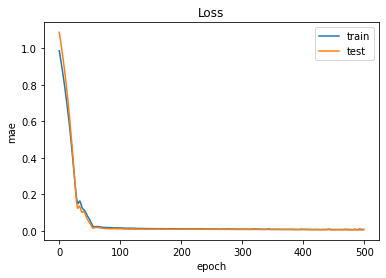

In [7]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.legend(['train', 'test'])
ax.set_title('Loss')
ax.set_xlabel('epoch')
ax.set_ylabel('mae')
plt.show()

In [8]:
y_pred = model.predict(X_test) * 100
y_pred

array([[ 61.36875 ],
       [182.5555  ],
       [ 15.866356],
       [120.889725],
       [161.36934 ],
       [195.48517 ],
       [ 41.74323 ],
       [157.4183  ],
       [118.82577 ],
       [199.09169 ],
       [116.76002 ],
       [193.66693 ],
       [167.24258 ],
       [ 36.023724],
       [ 24.86029 ],
       [ 69.41709 ],
       [ 53.424644],
       [ 57.38252 ],
       [ 75.51048 ],
       [ 26.69382 ]], dtype=float32)

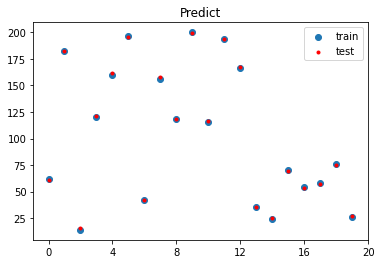

In [9]:
fig, ax = plt.subplots()
ax.scatter(np.arange(len(y_test)), y_test*100, label='train')
ax.scatter(np.arange(len(y_pred)), y_pred, marker='.', color='r', label='test')
ax.legend()
ax.set_xticks(list(range(0, 21, 4)))
ax.set_xticklabels(list(range(0, 21, 4)))
ax.set_title('Predict')

plt.show()

In [10]:
test_data = [[i] for i in range(35, 40)]

x = np.array(test_data) / 100
x = x.reshape(-1, 5, 1)

(model.predict(x)*100).tolist()  # 80이 나와야함

[[79.59547424316406]]